# Voxel Designer - Frame

In [26]:
using Plots
using LinearAlgebra
using NLopt
import JSON
using SparseArrays
using StaticArrays, BenchmarkTools
using Statistics

In [27]:
include("./julia/FEM_frame.jl")
include("./julia/compliant_mechanisms_frame.jl")

simulateAndExport (generic function with 1 method)

In [4]:
function complianMechanismOptimization(fileName,scale,dmax,amax,maxeval=500,SIMP=false,threshold=0.25,exageration=100.0,save=true)
    
    setup = getSetup("json/$(fileName)")
    E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
    problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
    
    ##todo change based on hinge
    free=map(node ->map(deg -> !deg, node["restrained_degrees_of_freedom"]), setup["nodes"])
    free=reshape(collect(Iterators.flatten(free)),size(Ls[1]))

    nel=length(setup["edges"])
    X=ones(nel)
    K,F,d,stress,dcomp,g=FEM_frame(problem,X);
    display("Original Domain:")
    display(plotFrame3D(problem,X,1.0))
    display("Optimization Details:")
    
    X=optimizeCompliantMechanism(problem,Ls,free,dmax,amax,500,SIMP)
    display(plotFrame3D(problem,X,1.0))
    display("Final Design:")
    display(plotFrameDeformed3D(problem,copy(X),scale,threshold,exageration))
    
    if(save)
        K,F,d,stress,dcomp,g=FEM_frame(problem,X);
        simulateAndExport(setup,X,dcomp,"json/result_frame_$(fileName)",threshold)
    end

    return X
    
end

complianMechanismOptimization (generic function with 6 methods)

"Original Domain:"

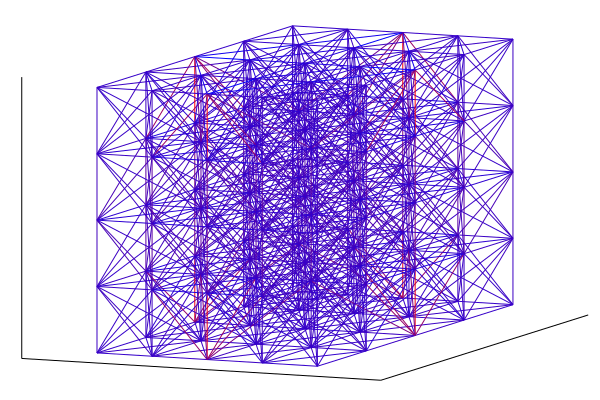

"Optimization Details:"

4


(20.658918115486593, [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001  …  0.001, 0.001, 0.001, 0.06760535994305254, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], :XTOL_REACHED)

"got 20.658918115486593 after 86 iterations (returned XTOL_REACHED)"

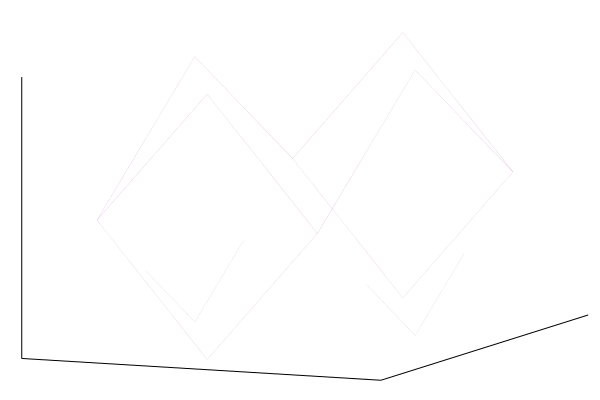

"Final Design:"

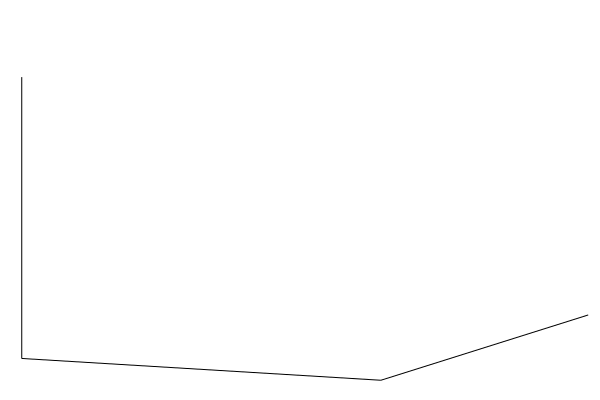

0.08258423495898998

 54.942264 seconds (170.42 M allocations: 71.790 GiB, 16.38% gc time)


In [18]:
fileName="compliant.json"
scale=1.0
dmax=-10
maxeval=500
threshold=0.01
exageration=0.01
threshold=amax*0.9
amax=1.0
SIMP=false
X=complianMechanismOptimization(fileName,scale,dmax,amax,maxeval,SIMP,threshold,exageration);
display(maximum(X))

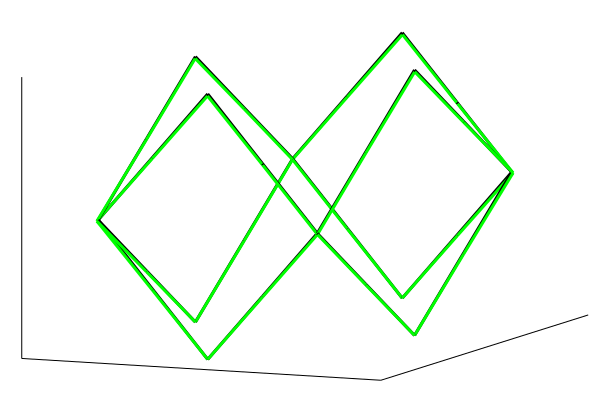

16682

In [19]:
threshold=0.01
setup = getSetup(fileName)
E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
display(plotFrameDeformed3D(problem,copy(X),scale,threshold,exageration))
K,F,d,stress,dcomp,g=FEM_frame(problem,X);
simulateAndExport(setup,X,dcomp,"json/result_frame_$(fileName)",threshold)
display(maximum(X))

"Original Domain:"

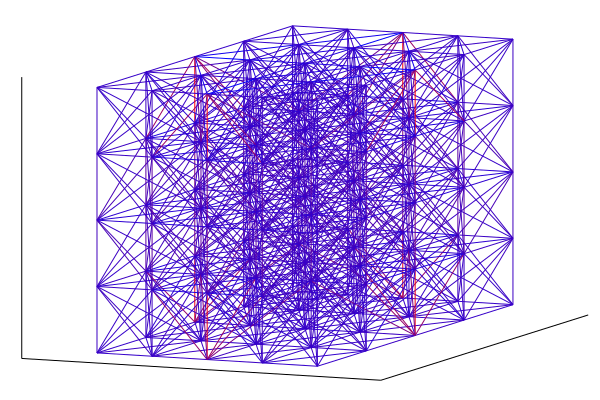

"Optimization Details:"

4


(3.72143137780254, [0.0001, 0.0003719830582593078, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.00010075692827694499  …  0.0001, 0.0001, 0.000106377767916541, 0.0020383751732940187, 0.0001, 0.0001, 0.00010083199153292129, 0.0001, 0.0001, 0.0001], :XTOL_REACHED)

"got 3.72143137780254 after 155 iterations (returned XTOL_REACHED)"

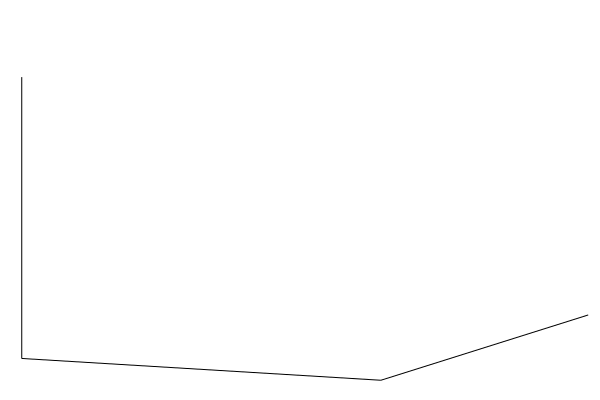

"Final Design:"

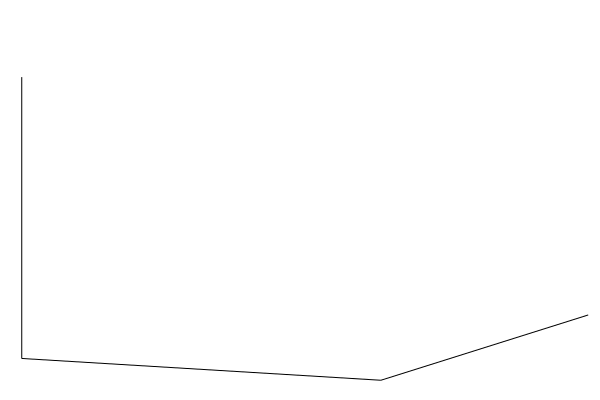

0.04363128207063847

107.348158 seconds (307.16 M allocations: 129.919 GiB, 14.54% gc time)


In [34]:
fileName="auxetic.json"
scale=1.0
dmax=-1000
maxeval=500
threshold=0.002
exageration=0.01
threshold=amax*0.9
amax=10.0
SIMP=false
X=complianMechanismOptimization(fileName,scale,dmax,amax,maxeval,SIMP,threshold,exageration);
display(maximum(X))

In [23]:
maximum(X)

1.0

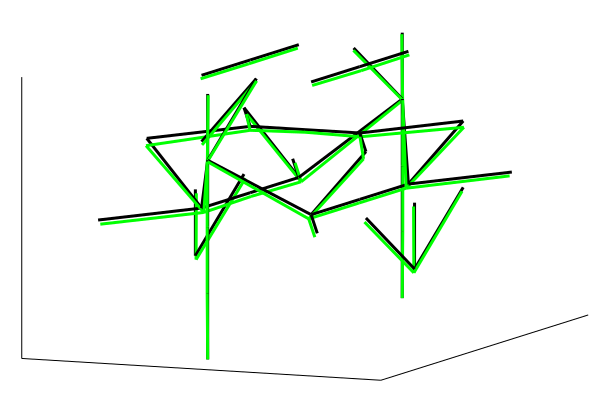

24906

In [36]:
threshold=0.003
setup = getSetup(fileName)
E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
display(plotFrameDeformed3D(problem,copy(X),scale,threshold,exageration))
K,F,d,stress,dcomp,g=FEM_frame(problem,X);
simulateAndExport(setup,X,dcomp,"json/result_frame_$(fileName)",threshold)

In [21]:
maximum(X)

1.0

"Original Domain:"

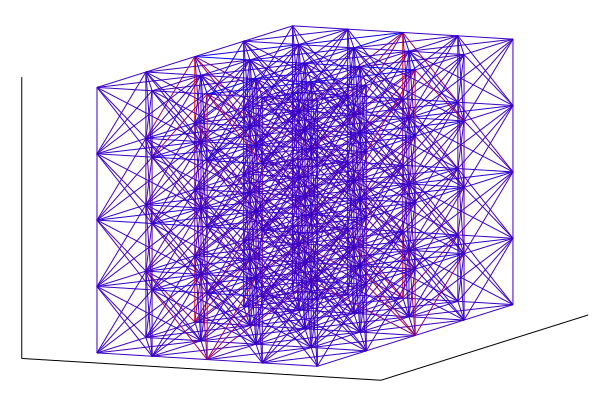

"Optimization Details:"

4


(116.67015256572549, [0.001, 0.001, 0.0010030282359435715, 0.42482148904496014, 0.0010094952335293617, 0.0010000117435280372, 0.0010001878983882887, 0.00101203851074148, 0.0010394546421426329, 0.0010000465414488021  …  0.0010000039148251442, 0.001001674386234358, 0.14850049691482783, 0.0012616927508544403, 0.0010251113741910516, 0.0011074610285613084, 0.4510220551425578, 0.001038713801640027, 0.0010007692215324984, 0.0010132795546389092], :XTOL_REACHED)

"got 116.67015256572549 after 129 iterations (returned XTOL_REACHED)"

"Area Optimization:"

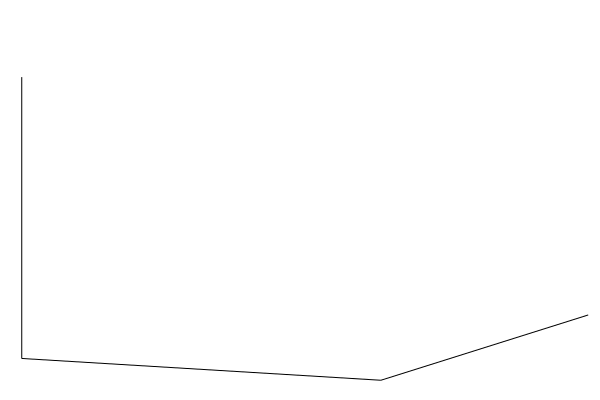

"Final Design:"

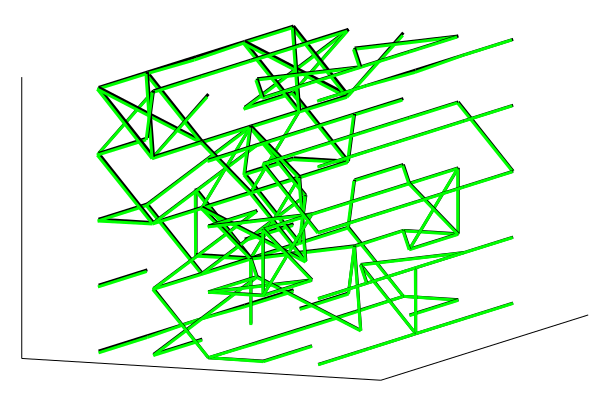

 94.428333 seconds (256.58 M allocations: 108.670 GiB, 11.31% gc time)


In [69]:
fileName="shear.json"
scale=1.0
dmax=-100
maxeval=500
threshold=0.01
exageration=0.01
X=complianMechanismOptimization(fileName,scale,dmax,maxeval,threshold,exageration);
display(maximum(X))

In [76]:
X

1036-element Array{Float64,1}:
 0.037659823916407584
 0.001
 0.001
 0.30702417005096916
 0.001
 0.001
 0.001
 0.1606810918249423
 0.27247441445323883
 0.04715266083031215
 0.31134437890240907
 0.1428581461920195
 0.2495309171416643
 ⋮
 0.23202276904843414
 0.04406610313328718
 0.27328165016938066
 0.001
 0.23202276904843236
 0.550463431683663
 0.06190965512563794
 0.001
 0.29165961934466544
 0.0034045557938901035
 0.07397688149498577
 0.001

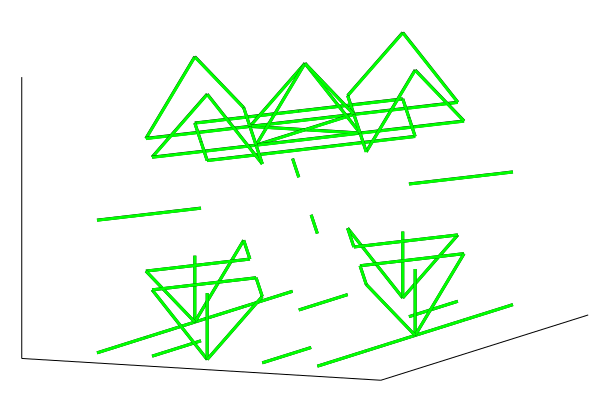

41031

In [80]:
threshold=0.3
setup = getSetup(fileName)
E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
display(plotFrameDeformed3D(problem,copy(X),scale,threshold,exageration))
K,F,d,stress,dcomp,g=FEM_frame(problem,X);
simulateAndExport(setup,X,dcomp,"json/result_frame_$(fileName)",threshold)